# **Assignment 7**

# Introduction

I'll use the `Citywide Payroll Data (Fiscal Year)` from [cityofnewyork.us](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/about_data). With this dataset, I'll be diving into the hours that someone works.

Overtime, in excess, can be interpreted as a metric that the tasks that people are performing are understaffed and can be an area of opportunity for opening new roles and helping with unemployment within the city. We will be looking at roles in Brooklyn with the most overtime worked.

In [1]:
# Loading in Pandas
import pandas as pd

# Getting the data from the URL and showing the first 5 records
salary_url = 'https://data.cityofnewyork.us/api/views/k397-673e/rows.csv?fourfour=k397-673e&cacheBust=1706801234&date=20241021&accessType=DOWNLOAD'
salary_df = pd.read_csv(salary_url)
salary_df.head()

C:\Users\Richie\AppData\Local\Temp\ipykernel_25228\1591543879.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  salary_df = pd.read_csv(salary_url)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


______________
# Data Exploration

For data exploration we'll be looking at statistics and getting high level information of our dataset.


Firstly, we'll get the number of rows and columns in this dataset:

In [2]:
# Get the shape of the data:
print(f"This data has:\n\t{salary_df.shape[0]:,} rows\n\t{salary_df.shape[1]} columns")

This data has:
	5,662,713 rows
	17 columns


Now we'll investigate the datatypes available. The output of the lines below will give each column which we can look at and their datatype where `object` means `string`:

In [3]:
# Getting datatypes
salary_df.dtypes

Fiscal Year                     int64
Payroll Number                float64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

Now we will see the number of unique values for each column:

In [4]:
# Getting number of unique values
salary_df.nunique()

Fiscal Year                        10
Payroll Number                    157
Agency Name                       167
Last Name                      178170
First Name                     102580
Mid Init                           45
Agency Start Date               15968
Work Location Borough              22
Title Description                1933
Leave Status as of June 30          5
Base Salary                    109846
Pay Basis                           4
Regular Hours                   96337
Regular Gross Paid            2245929
OT Hours                        65175
Total OT Paid                 1071621
Total Other Pay               1241214
dtype: int64

Using `df.describe()` we can see the quartiles, mean, standard deviation, maximum, and minimum values.

In [5]:
# Getting the summary stats of the dataframe
salary_df.describe().style.format("{:.2f}")

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,5662713.00,3917273.00,5662713.00,5662713.00,5662713.00,5662713.00,5662713.00,5662713.00
mean,2018.58,574.77,45023.93,658.87,42937.78,63.92,3457.58,3056.25
std,2.85,301.49,43525.34,885.54,40705.20,166.86,9832.35,6216.89
min,2014.00,2.00,0.01,-1872.77,-205451.85,-209.00,-26493.88,-281595.04
25%,2016.00,300.00,33.18,0.00,3330.69,0.00,0.00,0.00
50%,2019.00,742.00,43079.00,0.00,35944.08,0.00,0.00,56.90
75%,2021.00,747.00,80393.00,1820.00,75847.55,0.00,108.75,3641.65
max,2023.00,996.00,414707.00,6666.00,672308.86,3692.90,255999.85,650000.00


By using `df.median()` we can get the median value for each column. In order to not get an error, we will pass the argument `numeric_only = True`:

In [6]:
# Getting the median values of each numeric
salary_df.median(numeric_only = True)

Fiscal Year            2019.00
Payroll Number          742.00
Base Salary           43079.00
Regular Hours             0.00
Regular Gross Paid    35944.08
OT Hours                  0.00
Total OT Paid             0.00
Total Other Pay          56.90
dtype: float64

Moving on, we will use `df.isnull().sum()` to get a count of null emtries by column:

In [7]:
# Getting missing value counts
salary_df.isnull().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                       13192
First Name                      13245
Mid Init                      2324561
Agency Start Date                  63
Work Location Borough          506233
Title Description                  96
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

Lastly, we will want to see some of the relationships within the data. An effective way to do so is by using visualizations. Below I have two. The first is using `pariplot()` from seborn which generates a scatterplot for each combination. 

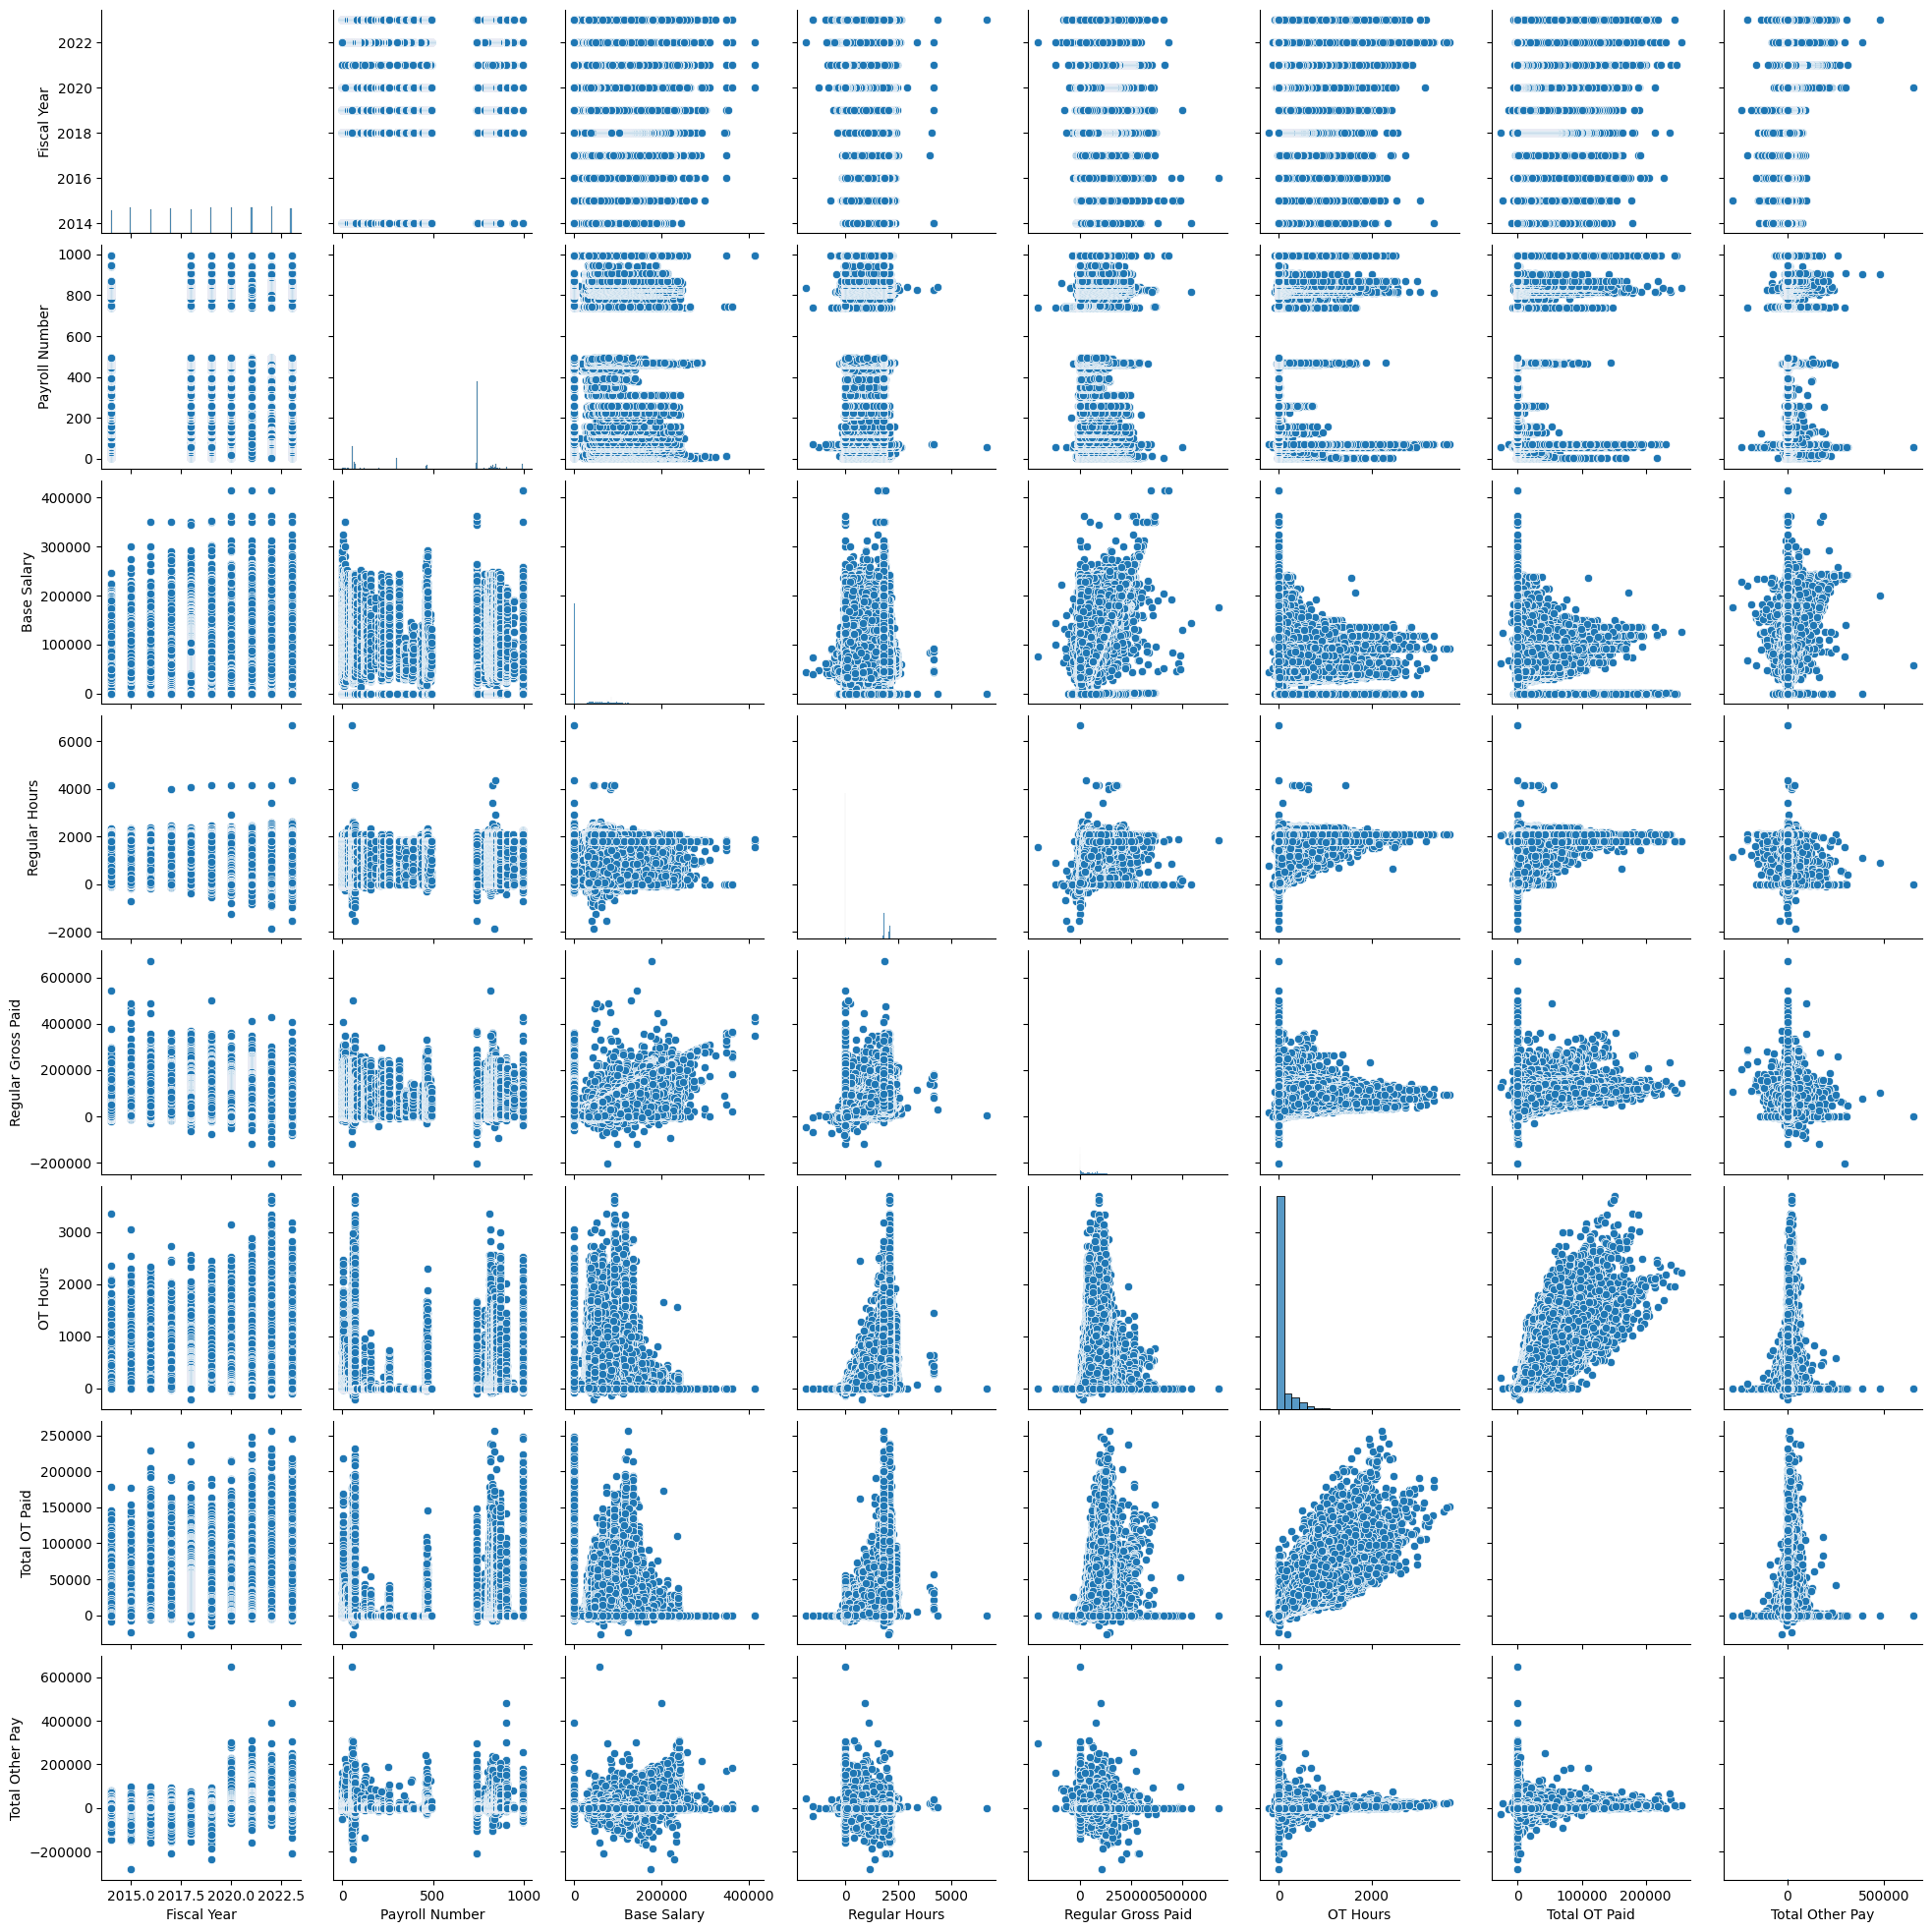

In [8]:
# Showing relationships bewtween variables
import seaborn as sns

sns.pairplot(salary_df)

The seaborn `pairplot()` function has histograms but they are rather small. In order to see them better, I will use the `df.hist()` method to generate histograms of the numeric fields:

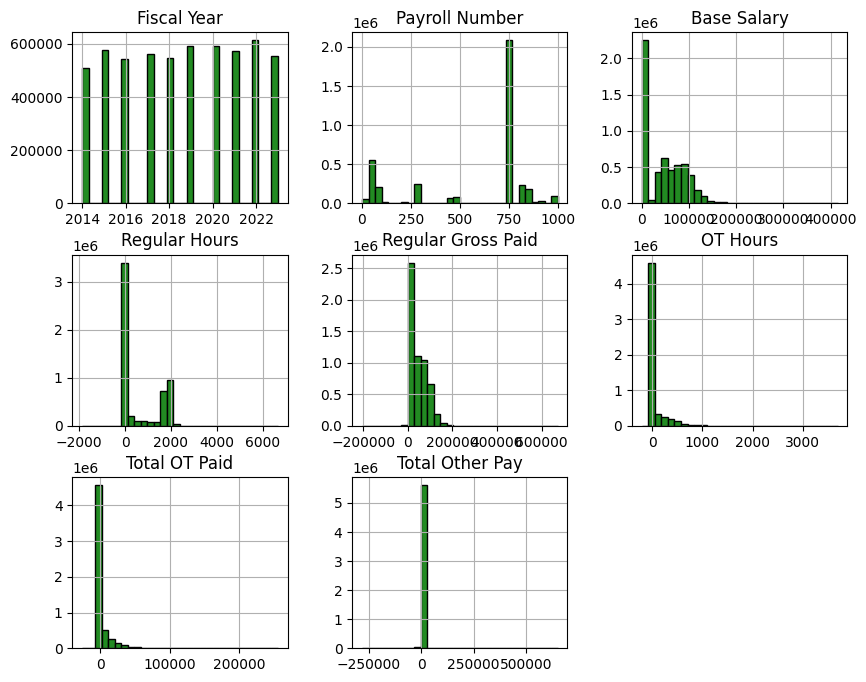

In [9]:
# importing matplotlib
import matplotlib.pyplot as plt

# Creating histograms of each numeric field
salary_df.hist(
    bins = 30,
    figsize = (10, 8),
    color = 'forestgreen',
    edgecolor = 'black'
)

plt.show()

______________
# Data Wrangling

#### 1. Modify multiple column names
I always prefer to have all lowercase and no spaces within my column names:

In [10]:
# Making all columns lowercase and replacing all spaces with underscores
salary_df.columns = salary_df.columns.str.lower().str.replace(' ','_')

salary_df.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


#### 2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

From using `df.dtypes` above, we can see that `agency_start_date` is the only field that needs to be modified. It needs to be converted from an object to a `datetime`. There are a few invalid dates, we will use the `errors = 'coerce'` argument to set these to `NaT`:

In [11]:
# Converting a date field
salary_df['agency_start_date'] = pd.to_datetime(salary_df['agency_start_date'], errors = 'coerce')

salary_df.dtypes

fiscal_year                            int64
payroll_number                       float64
agency_name                           object
last_name                             object
first_name                            object
mid_init                              object
agency_start_date             datetime64[ns]
work_location_borough                 object
title_description                     object
leave_status_as_of_june_30            object
base_salary                          float64
pay_basis                             object
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
dtype: object

#### 3. Fix missing and invalid values in data.
Many of the `work_location_borough` values are null. We will attempt to fill these based on the agency name. That is,if the agency name contains `Kings` then we will assume that it's Brooklyn:

In [76]:
salary_df.loc[
    salary_df['work_location_borough'].isna() & salary_df['agency_name'].str.lower().str.contains('kings'),
    'work_location_borough'
    ] = 'Brooklyn'

#### 4. Create new columns based on existing columns or calculations.
I'll start by creating a new column called `fixed_regular_hours` and `fixed_ot_hours` setting any negative hours worked to be 0:

In [77]:
salary_df['fixed_regular_hours'] = salary_df['regular_hours'].apply(lambda x: 0 if x < 0 else x)
salary_df['fixed_ot_hours'] = salary_df['ot_hours'].apply(lambda x: 0 if x < 0 else x)

salary_df.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,fixed_regular_hours,fixed_ot_hours
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,1820.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,1820.0,0.0


#### 5. Drop column(s) from your dataset.
We're going to remove columns which aren't needed for our analysis:

In [78]:
columns_to_keep = [
    'fiscal_year',
    'agency_name',
    'work_location_borough',
    'title_description',
    'fixed_regular_hours',
    'fixed_ot_hours'
]
trimmed_df = salary_df[columns_to_keep]

trimmed_df.head(2)

,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,1820.0,0.0
1,2020,OFFICE OF EMERGENCY MANAGEMENT,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,1820.0,0.0


#### 6. Drop a row(s) from your dataset.
We're going to remove entries where the `work_location_borough` is not Brookyln.

In [79]:
starting_size = trimmed_df.shape[0]

trimmed_df = trimmed_df.loc[trimmed_df['work_location_borough'].str.lower() == "brooklyn"]

print(f"{starting_size - trimmed_df.shape[0]:,} records removed from other boroughs.")

5,183,441 records removed from other boroughs.


#### 7. Sort your data based on multiple variables.
For this data, it'd likely be best to see it sorted by `fiscal_year` ascending and `ot_hours` descending:

In [80]:
#trimmed_df = 
trimmed_df.sort_values(['fiscal_year', 'fixed_ot_hours'], ascending = [True, False])

,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours
2394808,2014,COMMUNITY COLLEGE (KINGSBORO),Brooklyn,CAMPUS PUBLIC SAFETY SERGEANT,2085.72,660.5
2396778,2014,COMMUNITY COLLEGE (KINGSBORO),Brooklyn,HIGH PRESSURE PLANT TENDER,2085.72,655.0
2395884,2014,COMMUNITY COLLEGE (KINGSBORO),Brooklyn,CAMPUS PUBLIC SAFETY SERGEANT,2085.72,654.0
2394712,2014,COMMUNITY COLLEGE (KINGSBORO),Brooklyn,COLLEGE ACCOUNTING ASSISTANT,1825.00,538.0
2395548,2014,COMMUNITY COLLEGE (KINGSBORO),Brooklyn,PAINTER,1825.00,534.5
...,...,...,...,...,...,...
5662658,2023,NYC HOUSING AUTHORITY,BROOKLYN,HOUSING ASSISTANT,1820.00,0.0
5662684,2023,NYC HOUSING AUTHORITY,BROOKLYN,ASSOCIATE STAFF ANALYST,1435.00,0.0
5662695,2023,NYC HOUSING AUTHORITY,BROOKLYN,CARETAKER,47.22,0.0
5662699,2023,NYC HOUSING AUTHORITY,BROOKLYN,SECRETARY,1820.00,0.0


#### 8. Filter your data based on some condition.
We'll remove entries where there are no OT hours worked at all:

In [81]:
starting_size = trimmed_df.shape[0]

trimmed_df = trimmed_df.loc[trimmed_df['fixed_ot_hours'] > 0]

print(f"{starting_size - trimmed_df.shape[0]:,} records removed with no OT hours worked.") 

179,181 records removed with no OT hours worked.


#### 9. Convert all the string values to upper or lower cases in one column.
We'll apply this to make every string column lowercase:

In [82]:
for column in trimmed_df.columns:
    if trimmed_df[column].dtype == "O":
        trimmed_df[column] = trimmed_df[column].str.lower()

trimmed_df.head(2)

,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours
9,2020,office of emergency management,brooklyn,emergency preparedness specialist,1820.0,348.5
11,2020,office of emergency management,brooklyn,emergency preparedness manager,1820.0,15.0


#### 10. Check whether numeric values are present in a given column of your dataframe.
We'll check each column to see if it's numeric and report which ones are:

In [83]:
numeric_possible = {col: pd.to_numeric(trimmed_df[col], errors='coerce').notna().any() for col in trimmed_df.columns}

for col, can_be_numeric in numeric_possible.items():
    print(f"{col}: {'Can be numeric' if can_be_numeric else 'Cannot be numeric'}")


fiscal_year: Can be numeric
agency_name: Cannot be numeric
work_location_borough: Cannot be numeric
title_description: Cannot be numeric
fixed_regular_hours: Can be numeric
fixed_ot_hours: Can be numeric


#### 11. Group your dataset by one column, and get the mean, min, and max values by group.
- Groupby()
- agg() or .apply()

We'll group by the `agency_name` column and see how `fixed_regular_hours` and `fixed_ot_hours` varies by group:

In [87]:
trimmed_df[
    ['agency_name', 'fixed_regular_hours','fixed_ot_hours']
    ].groupby(
    'agency_name'
    ).agg(
        ['mean','min','max', 'sum']
        ).sort_values(
            ('fixed_ot_hours','sum'),
            ascending = False
        )

fixed_regular_hours                    \
                                              mean      min      max   
agency_name                                                            
police department                      1999.436682    80.00  2280.00   
fire department                        1942.243251     0.00  2513.00   
department of sanitation               2009.453931    24.00  2480.00   
nyc housing authority                  1823.111127     0.00  2230.00   
hra/dept of social services            1734.707376     0.00  2170.00   
admin for children's svcs              1575.166159     0.00  2204.57   
dept of environment protection         1862.248215     0.00  2152.00   
department of transportation           1778.843175    40.00  2213.75   
department of correction               1966.153649     0.00  2115.43   
dept of parks & recreation              981.592258     0.00  2241.15   
dept of citywide admin svcs            1871.998188     0.00  2171.42   
dept. of homeless services             1755.148514     0.00  2160.00   
board of election                      1545.993353    18.00  2098.00   
department of education admin          1689.509471     0.00  2160.00   
dept of health/mental hygiene          1609.037108    47.00  2147.43   
nyc employees retirement sys           1652.166945    45.00  2091.42   
district attorney kings county         1752.497843     0.00  2091.42   
community college (kingsboro)          1774.486376    90.00  2092.57   
office of emergency management         1582.036294    65.00  1840.00   
department of finance                  1849.973429     0.00  2091.42   
dept of info tech & telecomm           1741.630379     0.00  1890.00   
department of buildings                1765.194102   105.00  2160.00   
law department                         1656.639263     0.00  2091.42   
housing preservation & dvlpmnt         1860.445604     0.00  2160.00   
department of probation                1884.239890    16.00  2160.00   
kings da                               1792.607832   154.28  2154.28   
technology & innovation                1749.105022   245.00  1823.00   
borough president-brooklyn             1740.408468   280.00  2085.72   
nyc fire pension fund                  1727.894737   735.00  1820.00   
department of investigation            1204.964286   270.00  1825.00   
admin trials and hearings              1677.255263   903.25  2080.00   
brooklyn community board #2            1820.000000  1820.00  1820.00   
mayors office of contract svcs         1308.000000   868.00  1750.00   
public administrator-kings             1827.500000  1825.00  1830.00   
civilian complaint review bd            710.000000   710.00   710.00   
office of the mayor                    1714.625000  1639.25  1790.00   
department of city planning            1820.000000  1820.00  1820.00   
human rights commission                1825.000000  1825.00  1825.00   
community college (manhattan)           361.000000   361.00   361.00   

                                             fixed_ot_hours                   \
                                         sum           mean     min      max   
agency_name                                                                    
police department               2.113185e+08     276.563238    0.02  2002.08   
fire department                 9.572929e+07     384.565644    0.25  2474.75   
department of sanitation        4.831732e+07     313.795691    0.50  2018.25   
nyc housing authority           3.759620e+07     241.794552    0.25  2043.00   
hra/dept of social services     3.754254e+07     206.683026    0.23  2736.50   
admin for children's svcs       1.572016e+07     226.697635    0.12  1793.25   
dept of environment protection  1.327411e+07     221.154463    0.07  1534.00   
department of transportation    1.068551e+07     252.608155    0.25  3045.00   
department of correction        6.551224e+06     344.110378    0.50  2338.02   
dept of parks & recreation      1.639554e+07  

#### 12. Group your dataset by two columns and then sort the aggregated results within the groups.
We'll group by `agency_name` and `fiscal_year` and then perform the same aggregations as before:

In [94]:
annual_summary =trimmed_df[
    ['fiscal_year','agency_name', 'fixed_regular_hours','fixed_ot_hours']
    ].groupby(
    ['fiscal_year','agency_name']
    ).agg(
        ['mean','min','max', 'sum']
        ).sort_values(
            ('fixed_ot_hours','sum'),
            ascending = False
        )

annual_summary.head(20)

fixed_regular_hours                   \
                                                    mean     min      max   
fiscal_year agency_name                                                     
2020        police department                2013.673949  210.00  2262.47   
2022        police department                2009.230160  224.00  2280.00   
2023        police department                2006.344943  175.00  2240.00   
2022        fire department                  1939.169710    0.00  2458.50   
2015        police department                2014.724231   88.05  2122.28   
2016        police department                2016.142551  172.50  2161.13   
2019        police department                1966.696076  112.00  2108.57   
2021        police department                2026.788398   80.00  2165.72   
2018        police department                1971.424347  125.72  2125.72   
2017        police department                1974.416130  112.00  2109.72   
2021        fire department                  1985.687278    0.00  2378.00   
2020        fire department                  1941.546742    0.00  2277.00   
2023        fire department                  1959.983655    0.00  2513.00   
2015        fire department                  1915.145412    0.00  2189.35   
2019        fire department                  1949.367793    0.00  2268.35   
2016        fire department                  1929.975355    0.00  2196.72   
2017        fire department                  1930.616606    0.00  2234.37   
2018        fire department                  1928.633641    0.00  2228.35   
2022        department of sanitation         1975.220317   80.00  2480.00   
2021        department of sanitation         2042.612241   56.00  2144.00   

                                                  fixed_ot_hours        \
                                              sum           mean   min   
fiscal_year agency_name                                                  
2020        police department         24876927.96     361.997792  0.08   
2022        police department         22433054.74     369.701674  0.08   
2023        police department         21802950.50     307.118843  0.08   
2022        fire department           11039693.16     568.004706  0.50   
2015        police department         23270064.87     277.531774  0.50   
2016        police department         23465883.15     253.057351  0.17   
2019        police department         24103827.11     229.636082  0.08   
2021        police department         23362789.86     242.358451  0.02   
2018        police department         24086862.67     226.492432  0.02   
2017        police department         23916102.58     228.365801  0.08   
2021        fire department           10649240.87     480.138650  0.25   
2020        fire department           11053225.60     415.592640  0.50   
2023        fire department           10991588.34     414.795578  0.33   
2015        fire department           10339870.08     342.436783  0.25   
2019        fire department           10362839.19     322.408463  0.50   
2016        fire department           10329228.10     318.602450  0.25   
2017        fire department           10635766.88     296.136616  0.25   
2018        fire department           10327833.15     290.266683  0.25   
2022        department of sanitation   5491112.48     464.330601  0.50   
2021        department of sanitation   5267896.97     499.415870  1.00   

                                                           
                                          max         sum  
fiscal_year agency_name                                    
2020        police department         1545.50  4472120.72  
2022        police department         2002.08  4127719.19  
2023        police department         1649.67  3337460.47  
2022        fire department           2414.77  3233650.79  
2015        police department         1279.25  3205491.99  
2016        police department         1249.17  2945334.51  
2019        police dep

Now we'll look to see the proportion that overtime hours are worked compared to all hours worked:

In [104]:
annual_summary['ot_proportion'] = annual_summary[('fixed_ot_hours', 'sum')] / (annual_summary[('fixed_regular_hours', 'sum')] + annual_summary[('fixed_ot_hours', 'sum')])
annual_summary['ot_proportion'].head(20)

fiscal_year  agency_name             
2020         police department           0.152377
2022         police department           0.155407
2023         police department           0.132753
2022         fire department             0.226552
2015         police department           0.121074
2016         police department           0.111518
2019         police department           0.104554
2021         police department           0.106806
2018         police department           0.103049
2017         police department           0.103672
2021         fire department             0.194717
2020         fire department             0.176312
2023         fire department             0.174667
2015         fire department             0.151683
2019         fire department             0.141919
2016         fire department             0.141691
2017         fire department             0.132990
2018         fire department             0.130816
2022         department of sanitation    0.190334
2021        

______________
# Conclusions  

The analysis shows that the New York City Police Department has the highest overtime hours worked, totaling 29,229,692.06 hours, followed by the Fire Department and the Department of Sanitation. Annually, the Police Department consistently leads in overtime, with around 13% of their total hours worked classified as overtime. These findings highlight the significant demands on public safety personnel, suggesting a need for review in staffing.

With more time, I would like to see the workload of these agencies and see the connection between the overtime hours and the work demanded. Additionally, I would like to explore how increased headcount could result in overtime spend savings.